In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt    # Make sure ipympl is installed (via pip) for interactive plots in Jupyter 
import mne

from GigascienceDataset import SubjectData

In [2]:
s01 = SubjectData('s01.mat')

Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=34048
    Range : 0 ... 34047 =      0.000 ...    66.498 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.

100 events found
Event IDs: [1]
[[ 1023     0     1]
 [ 4607     0     1]
 [ 8191     0     1]
 [11775     0     1]
 [15359     0     1]]


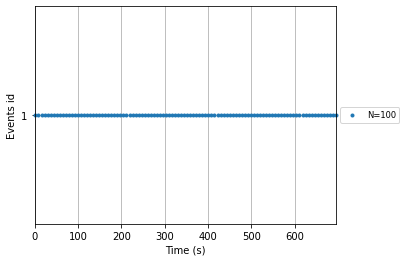

Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 100 events and 359 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPZ', 'FPZ', 'FP2', 'AF8', 'AF4', 'AFZ', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
    Rejecting  epoch based on EEG : ['FP1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPZ', 'FPZ', 'FP2', 'AF8', 'AF4', 'AFZ', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz

In [12]:
events = mne.find_events(s01.raw_imagery_left, stim_channel=s01.stim_channel)
print(events[:5])
fig = mne.viz.plot_events(events, sfreq=s01.mat_srate, first_samp=s01.raw_imagery_left.first_samp)
reject_criteria = {'eeg': 150e-6}       # 250 µV The default from the overview tutorial
epochs = mne.Epochs(s01.raw_imagery_left, events, tmin=-0.2, tmax=0.5, reject=reject_criteria, preload=True)

In [6]:
%matplotlib widget

#TODO: Get this working to make sure alignment is OK
# https://mne.tools/stable/auto_examples/visualization/plot_eeg_on_scalp.html#sphx-glr-auto-examples-visualization-plot-eeg-on-scalp-py

from mne.viz import plot_alignment, set_3d_view

data_path = mne.datasets.sample.data_path()
subjects_dir = data_path + '/subjects'
fig = plot_alignment(s01.raw_rest.info, subject='sample', dig=True,
                     eeg=['original', 'projected'],
                     coord_frame='head', subjects_dir=subjects_dir)
set_3d_view(figure=fig, azimuth=135, elevation=80)

Using default location ~/mne_data for sample...
Creating ~/mne_data



Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: /Users/justin/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/Users/justin/mne_data/MNE-sample-data']
Attempting to create new mne-python configuration file:
/Users/justin/.mne/mne-python.json
Using outer_skin.surf for head surface.


<ipython-input-6-a4772c04bdf4>:7: RuntimeWarning: Digitization points not found. Cannot plot digitization.
  fig = plot_alignment(s01.raw_rest.info, subject='sample', dig=True,


RuntimeError: Could not load any valid 3D backend: pyvista, mayavi, notebook

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = [6.4, 4.8]
raw.plot_psd()

In [ ]:
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(raw)
# ica.plot_properties(raw)
ica.plot_sources(raw)

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
# ica.plot_properties(raw)
ica.plot_sources(raw)